In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
from sklearn import preprocessing

def pca(data_array,principal_components,k):

    # calculate the covariance matrix
    covariance_matrix = np.cov(np.transpose(data_array))
    w, eigenvectors = np.linalg.eig(covariance_matrix)
    eigenvectors = np.real_if_close(eigenvectors, tol=1)

    # tranposes eigenvectors
    new_eigenvectors = preprocessing.normalize(np.transpose(eigenvectors))

    # gets each principal component
    for i in range(k):
        principal_components[i] = new_eigenvectors[i]

    # projected NBA team data onto these principal components
    projected_components = np.transpose(
        (data_array @ np.transpose(principal_components))
    )

    return projected_components.tolist()

In [9]:
from api_helpers.team_stats_helpers import load_dataframe

nba_dataframe = load_dataframe(["PTS","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST"])
nba_dataframe = nba_dataframe.drop(nba_dataframe[nba_dataframe["FGA"] == 0].index)
nba_dataframe = nba_dataframe.reset_index(drop=True)
nba_dataframe

,TEAM_ID,YEAR,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PTS
0,1610612737,1982-83,NaN,3352,7146,0.469,45,188,0.239,1586,2111,0.751,1139,2433,3572,1945,8335
1,1610612737,1983-84,NaN,3230,6809,0.474,23,106,0.217,1838,2414,0.761,1112,2232,3344,1827,8321
2,1610612737,1984-85,NaN,3444,7119,0.484,73,235,0.311,1782,2371,0.752,1161,2345,3506,2009,8743
3,1610612737,1985-86,NaN,3447,7029,0.490,33,166,0.199,1979,2704,0.732,1249,2405,3654,2025,8906
4,1610612737,1986-87,NaN,3435,7141,0.481,135,425,0.318,2019,2661,0.759,1350,2478,3828,2077,9024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1610612766,2019-20,NaN,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,6687
1182,1610612766,2020-21,NaN,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,7881
1183,1610612766,2021-22,NaN,3508,7497,0.468,1143,3130,0.365,1298,1753,0.740,888,2767,3655,2302,9457
1184,1610612766,2022-23,NaN,3385,7413,0.457,881,2669,0.330,1447,1933,0.749,901,2751,3652,2062,9098


In [10]:
# use principal component analysis to find the top k eigenvectors

import numpy as np

k = 4

all_teams_array = np.array(nba_dataframe[["PTS","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST"]])

championship_teams_index = nba_dataframe.index[nba_dataframe["NBA_FINALS_APPEARANCE"] == "LEAGUE CHAMPION"].to_list()

principal_components = [[0] * len(all_teams_array)] * k

top_k_components = pca(all_teams_array,principal_components,k)
print(championship_teams_index)

[43, 45, 67, 83, 117, 156, 157, 158, 161, 162, 163, 218, 272, 306, 308, 309, 313, 327, 328, 402, 404, 405, 417, 418, 419, 426, 427, 437, 459, 465, 466, 516, 716, 900, 904, 906, 908, 915, 991, 1116, 1117, 1131]


In [19]:
# select champion teams
print(len(top_k_components[0]))
champion_k_component_1 = [top_k_components[0][idx] for idx in championship_teams_index]
champion_k_component_2 = [top_k_components[1][idx] for idx in championship_teams_index]

1186


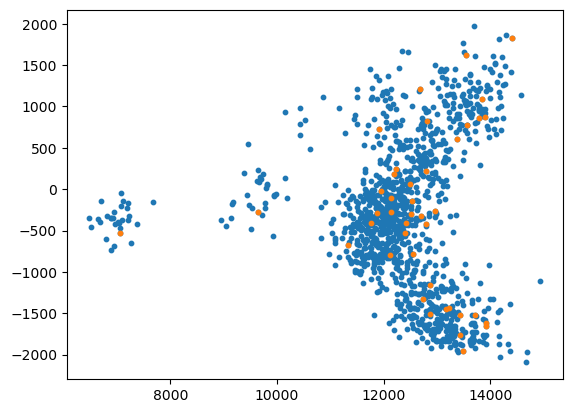

In [22]:
# plot data
from matplotlib import pyplot as plt

plt.scatter(top_k_components[0],top_k_components[1],s=10)
plt.scatter(champion_k_component_1,champion_k_component_2,s=10)
